#**SKRIPSI**
Voice Chatbot Human Following Robot

created by **Muhammad Radiga G**

---

##**Install Library**

In [ ]:
!pip install tf-keras
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [ ]:
!pip install huggingface-hub==0.24.7
!pip install transformers==4.42.4
!pip install nlp-id
!pip install googletrans==4.0.0-rc1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.0
    Uninstalling huggingface-hub-0.27.0:
      Successfully uninstalled huggingface-hub-0.27.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.14.0 requires huggingface-hub>=0.25.0, but you have huggingface-hub 0.24.7 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
  Attempting uninstall: transformers
    Fo

In [ ]:
!pip install --upgrade huggingface-hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.5/450.5 kB 24.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.23.4
    Uninstalling huggingface-hub-0.23.4:
      Successfully uninstalled huggingface-hub-0.23.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nlp-id 0.1.18.0 requires huggingface-hub==0.23.4, but you have huggingface-hub 0.27.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import string
import re

import nlp_id.lemmatizer as Lemmatizer
import nlp_id.tokenizer as Tokenizer
import nlp_id.stopword as StopWord


import tensorflow as tf
import transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## **Data Acquisition**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_lansia.json to dataset_lansia.json


In [ ]:
key_norm = files.upload()

Saving key_norm_v2.csv to key_norm_v2.csv


In [ ]:
with open("/content/dataset_lansia.json") as f:
  datasetQA = json.load(f)

In [ ]:
datasetQA

{'data': [{'label': 'halo',
   'questions': ['Halo robot?',
    'Halo ha ?',
    'Halo ?',
    'Hi?',
    'Hey?',
    'Hola ?',
    'haiiii',
    'heeeyy',
    'punten',
    'permisi'],
   'answers': ['Hello, bisa saya bantu?',
    'Hai ada apa ya?',
    'hai membutuhkan saya?',
    'Halo',
    'hai',
    'iya',
    'kenapa',
    'ada yang bisa saya bantu?']},
  {'label': 'kondisi',
   'questions': ['Halo bagiamana kabarmu robot?',
    'Kabar?',
    'Sehat ?',
    'Sekarang kabarnya gimana',
    'Kondisi mu gimana',
    'Bagaimana Kabar anda sekarang ?',
    'bagaimana kondisi anda saat ini',
    'Apakah kamu baik-baik saja',
    'Kondisi saat ini bagaimana?',
    'Berikan kondisi dan kabarmu sekarang?'],
   'answers': ['Halo, kabar saya baik-baik saja',
    'Kabar baik, bagaimana kabar anda?',
    'Hari ini saya baik-baik saja',
    'Sekarang saya dalam kondisi baik',
    'Saat ini saya berada dalam kondisi baik dan siap membantu']},
  {'label': 'pagi',
   'questions': ['selamat pagi 

### Transform JSON to Dataframe

In [ ]:
df = pd.DataFrame(columns=['label', 'questions'])
for item in datasetQA['data']:
    label = item['label']
    for question in item['questions']:
      df = pd.concat([df, pd.DataFrame([{'label': label, 'questions': question}])], ignore_index=True)
classes = df['label'].unique().tolist()

In [ ]:
df

,label,questions
0,halo,Halo robot?
1,halo,Halo ha ?
2,halo,Halo ?
3,halo,Hi?
4,halo,Hey?
...,...,...
447,berita,saya ingin mengetahui berita
448,berita,berita apa yang sedang ramai
449,berita,berita terkini
450,berita,apa berita terkini


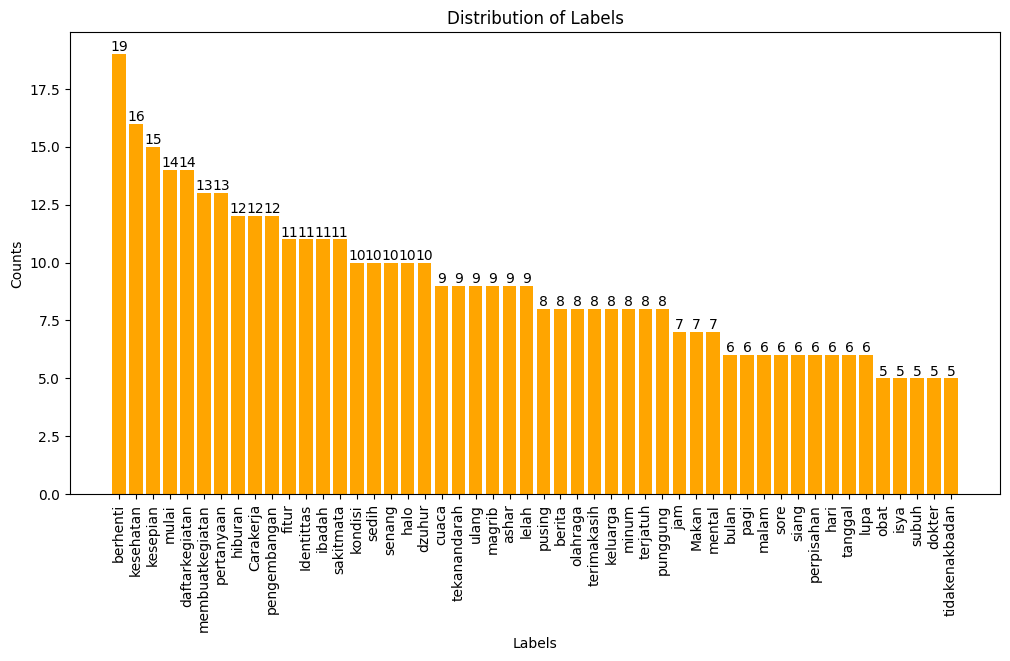

In [ ]:
# prompt: membuat plot bar dan setiap bar diberi tahu nilainya

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'label' column
label_counts = df['label'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(label_counts.index, label_counts.values, color = "orange")

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Distribution of Labels")
plt.xticks(rotation=90)
plt.show()

jumlah class 50


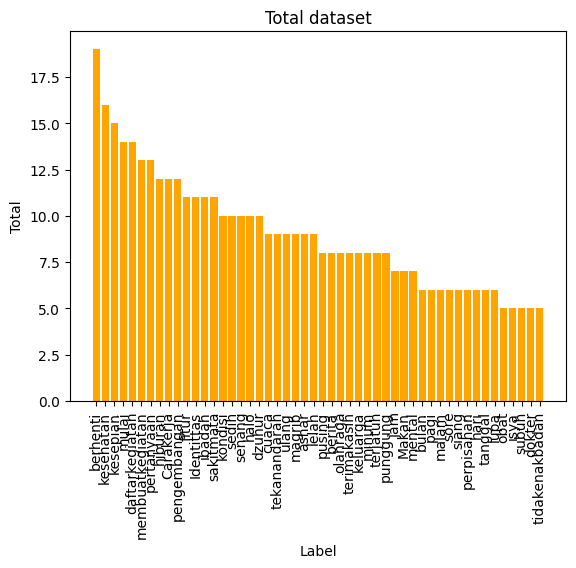

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

x = df['label'].value_counts().index
y = df['label'].value_counts().values
print('jumlah class {}'.format(len(x)))

ax.bar(x, y, color='orange')

ax.set_xlabel('Label')
ax.set_ylabel('Total')
ax.set_title('Total dataset')

plt.xticks(rotation=90)
plt.show()


## **Text Cleaning**

In [ ]:
# import nlp_id
# from nlp_id.stopword import StopWord
# stopword = StopWord()
# stopword.get_stopword()

In [ ]:
import nlp_id
from nlp_id.stopword import StopWord

# Initialize the StopWord class
stopword = StopWord()

# Specify the word you want to remove
word_to_remove = ['sendirian', 'sendiri', 'sendirinya', 'bekerja', 'memulai', 'mulai', 'bulan', 'hari', 'minggu', 'bertanya', 'nanya', 'tanya', 'siapa', 'bikin', 'buat', 'membuat', 'jangan']

# Remove the word from the stopword list if it exists
for word in word_to_remove:
    if word in stopword.stopwords:
        stopword.stopwords.remove(word)

# Now you can use stopword.stopwords without the specific word
stopword.stopwords

['ada',
 'adalagi',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agak-agak',
 'agaknya',
 'agar',
 'aja',
 'akan',
 'akankah',
 'akankan',
 'akhir',
 'akhir-akhirnya',
 'akhirannya',
 'akhiri',
 'akhirinya',
 'akhirnya',
 'aku',
 'akulah',
 'akunya',
 'akurat',
 'akutu',
 'ala',
 'alamak',
 'alhamdulillah',
 'alhasil',
 'amat',
 'amat-amat',
 'amatlah',
 'anda',
 'anda-anda',
 'andai',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apa-apanya',
 'apaan',
 'apabila',
 'apaitu',
 'apakah',
 'apalagi',
 'apanya',
 'apasaja',
 'apatah',
 'apesnya',
 'arah',
 'artinya',
 'asal',
 'asalkan',
 'asumsinya',
 'asumsikan',
 'atas',
 'atas-atas',
 'atas-batas',
 'ataspun',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagi-bagi',
 'bagian',
 'bagikan',
 'bahasakan',
 'bahasanya',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bak',
 'bakal',
 'bakal-bakal',
 'bakalan',
 'balik',
 'balikan',
 'balikk

In [ ]:
key_norms = pd.read_csv("/content/key_norm_v2.csv")


In [ ]:
def casefolding(x):
  x = x.lower()             #changing lowercase letter
  x = re.sub(r"\d+", "", x) #remove numeric
  x = x.translate(str.maketrans("","",string.punctuation)) #remove punctuation
  x = x.strip()             #remove whitespace
  return x

def text_normalize(x):
  x = ' '.join([key_norms[key_norms['singkat'] == word]['hasil'].values[0] if (key_norms['singkat'] == word).any() else word for word in x.split()])
  x = str.lower(x)
  return x

def stop_word_id(x):
  # x = stopword.stopwords.remove_stopword(x)
  x = x.split()
  x = [word for word in x if word not in stopword.stopwords]
  return " ".join(x)


In [ ]:
def text_cleaning(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = stop_word_id(text)
  return text

In [ ]:
df['clean'] = df['questions'].apply(text_cleaning)

In [ ]:
df.duplicated().sum()

13

In [ ]:
df

,label,questions,clean
0,halo,Halo robot?,halo robot
1,halo,Halo ha ?,halo tertawa
2,halo,Halo ?,halo
3,halo,Hi?,hai
4,halo,Hey?,hai
...,...,...,...
447,berita,saya ingin mengetahui berita,berita
448,berita,berita apa yang sedang ramai,berita ramai
449,berita,berita terkini,berita terkini
450,berita,apa berita terkini,berita terkini


## **Text Preprocessing**

Lemmatization

In [ ]:
import nlp_id
from nlp_id.lemmatizer import Lemmatizer
lemmatizer_id = Lemmatizer()
def lemmati(text):
  text = lemmatizer_id.lemmatize(text)
  return text

In [ ]:
df['lemma'] = df['clean'].apply(lemmati)

In [ ]:
lem = filtered_df = df[df['label'] == "pengembangan"]

In [ ]:
lem

,label,questions,clean,lemma
254,pengembangan,ada pengembangan kedepan,pengembangan kedepan,kembang depan
255,pengembangan,pengembangan,pengembangan,kembang
256,pengembangan,jelaskan pengembangan yang akan dilakukan,pengembangan,kembang
257,pengembangan,berikan hal-hal yang ingin dikembangkan kedepan,halhal dikembangkan kedepan,halhal kembang depan
258,pengembangan,jelaskan hal yang ingin dikembangkan,hal dikembangkan,hal kembang
259,pengembangan,pengembangan,pengembangan,kembang
260,pengembangan,ada pembaharuan kedepan,pembaharuan kedepan,baharu depan
261,pengembangan,pembaharuan,pembaharuan,baharu
262,pengembangan,jelaskan pembaharuan yang akan dilakukan,pembaharuan,baharu
263,pengembangan,berikan hal-hal yang ingin diperbaharui kedepan,halhal diperbaharui kedepan,halhal baharu depan


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
df['labels'] = labelencoder.fit_transform(df['label'])
df

,label,questions,clean,lemma,labels
0,halo,Halo robot?,halo robot,halo robot,12
1,halo,Halo ha ?,halo tertawa,halo tertawa,12
2,halo,Halo ?,halo,halo,12
3,halo,Hi?,hai,hai,12
4,halo,Hey?,hai,hai,12
...,...,...,...,...,...
447,berita,saya ingin mengetahui berita,berita,berita,5
448,berita,berita apa yang sedang ramai,berita ramai,berita ramai,5
449,berita,berita terkini,berita terkini,berita kini,5
450,berita,apa berita terkini,berita terkini,berita kini,5


In [ ]:
labeling = df.drop(columns=['lemma', 'questions', 'clean' ], axis=1)
unique_values = labeling.groupby('labels').apply(lambda x: x.drop_duplicates())
unique_values

<ipython-input-27-697476461906>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_values = labeling.groupby('labels').apply(lambda x: x.drop_duplicates())


,,label,labels
labels,,,
0,231,Carakerja,0
1,78,Identittas,1
2,121,Makan,2
3,281,ashar,3
4,198,berhenti,4
5,444,berita,5
6,101,bulan,6
7,369,cuaca,7
8,107,daftarkegiatan,8


In [ ]:
df = df.drop(columns=['label', 'questions', 'clean' ], axis=1)
df['clean'] = df['lemma']


In [ ]:
df = df.drop(columns=['lemma'])
df


,labels,clean
0,12,halo robot
1,12,halo tertawa
2,12,halo
3,12,hai
4,12,hai
...,...,...
447,5,berita
448,5,berita ramai
449,5,berita kini
450,5,berita kini


In [ ]:
grouped = df.groupby('labels').count().reset_index()
print(grouped)

    labels  clean
0        0     12
1        1     11
2        2      7
3        3      9
4        4     19
5        5      8
6        6      6
7        7      9
8        8     14
9        9      5
10      10     10
11      11     11
12      12     10
13      13      6
14      14     12
15      15     11
16      16      5
17      17      7
18      18      8
19      19     16
20      20     15
21      21     10
22      22      9
23      23      6
24      24      9
25      25      6
26      26     13
27      27      7
28      28      8
29      29     14
30      30      5
31      31      8
32      32      6
33      33     12
34      34      6
35      35     13
36      36      8
37      37      8
38      38     11
39      39     10
40      40     10
41      41      6
42      42      6
43      43      5
44      44      6
45      45      9
46      46      8
47      47      8
48      48      5
49      49      9


## **Splitting Data**


Data Augmentation

In [ ]:
from googletrans import Translator
import random
def back_translation_indonesian(sentence, src='id', target='en'):
    translator = Translator()
    # Translate to target language (e.g., English)
    translation = translator.translate(sentence, src=src, dest=target).text
    # Translate back to Indonesian
    back_translated = translator.translate(translation, src=target, dest=src).text
    return back_translated


In [ ]:
def random_deletion_indonesian(sentence, p=0.2):
    words = sentence.split()
    if len(words) == 1:
        return sentence
    remaining_words = [word for word in words if random.uniform(0, 1) > p]
    return ' '.join(remaining_words) if remaining_words else random.choice(words)


In [ ]:
def random_swap_indonesian(sentence, n=1):
    words = sentence.split()
    if len(words) < 2: # Check if there are at least 2 words to swap
        return sentence
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return ' '.join(words)

In [ ]:
def random_insertion_indonesian(sentence, n=1):
    words = sentence.split()
    for _ in range(n):
        new_word = random.choice(words)
        insertion_point = random.randint(0, len(words)-1)
        words.insert(insertion_point, new_word)
    return ' '.join(words)

In [ ]:
def augment_sentence_indonesian(sentence):
    # Synonym Replacement
    augmented_sentence = back_translation_indonesian(sentence)
    # Random Insertion
    augmented_sentence = random_insertion_indonesian(augmented_sentence, n=2)

    # Random Deletion
    augmented_sentence = random_deletion_indonesian(augmented_sentence, p=0.3)

    # Random Swap
    augmented_sentence = random_swap_indonesian(augmented_sentence, n=2)

    return augmented_sentence


In [ ]:
# df['clean'] = df['clean'].apply(augment_sentence_indonesian)
# df



---



Ovesampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd

# Misalkan Anda memiliki data dan label_train seperti ini
label_train = df['labels']
data = df.drop(columns=['labels'])

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(data, label_train)

# Gabungkan data dan label_train
resampled_data = pd.DataFrame(X_resampled, columns=data.columns)
resampled_data['labels'] = y_resampled

print(f"Number of Before Oversampling Data: {df.shape[0]} data")
print(f"Numbers of After Oversampling Data: {resampled_data.shape[0]} data")

Number of Before Oversampling Data: 452 data
Numbers of After Oversampling Data: 950 data


In [ ]:
tigapuluh = df[df['labels'] == 15]
tigapuluh

,labels,clean
128,15,ibadah hari
129,15,ibadah
130,15,daftar ibadah
131,15,ingat ibadah
132,15,ibadah
133,15,shalat hari
134,15,sholat
135,15,ibadah
136,15,shalat
137,15,salat


In [ ]:
tigapuluh = [resampled_data[resampled_data['labels'] == 15].iloc[i]['clean'] for i in range(10)]
tigapuluh


['ibadah hari',
 'ibadah',
 'daftar ibadah',
 'ingat ibadah',
 'ibadah',
 'shalat hari',
 'sholat',
 'ibadah',
 'shalat',
 'salat']

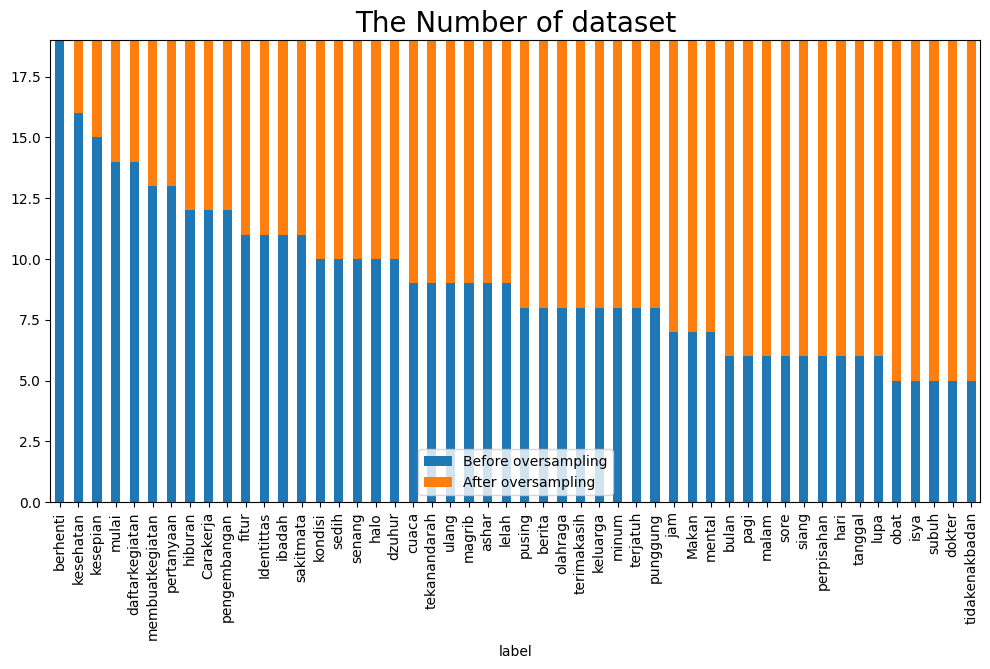

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

# Assuming 'labeling' and 'resampled_data' DataFrames are already defined

x = labeling['label'].value_counts().index
y = df['labels'].value_counts().values

a = resampled_data['labels'].value_counts().index
b = resampled_data['labels'].value_counts().values

plot_df = pd.DataFrame({'Before oversampling': y, 'After oversampling': b - y}, index=x)

# Use the new DataFrame for plotting
ax = plot_df.plot.bar(stacked=True, figsize=(12,6))
ax.set_title('The Number of dataset', fontsize=20)
ax.set_ylim(0,19)
ax.set_xticklabels(x)



plt.show()

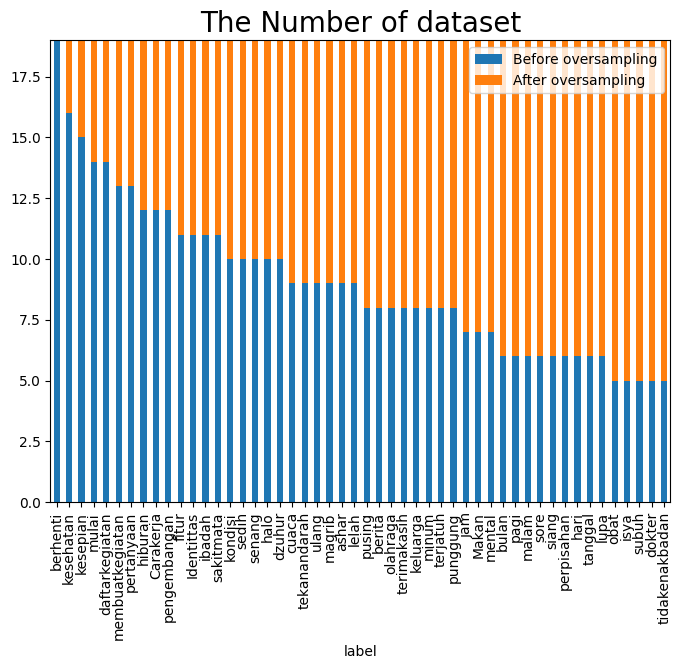

In [ ]:
from matplotlib import pyplot as plt

x = labeling['label'].value_counts().index
y = df['labels'].value_counts().values

a = resampled_data['labels'].value_counts().index
b = resampled_data['labels'].value_counts().values

plot_df = pd.DataFrame({'Before oversampling': y, 'After oversampling': b - y}, index=x)

# Use the new DataFrame for plotting
ax = plot_df.plot.bar(stacked=True, figsize=(8,6))
ax.set_title('The Number of dataset', fontsize=20)
ax.set_ylim(0,19)
ax.set_xticklabels(x)

# plt.xticks(rotation=90)
plt.show()

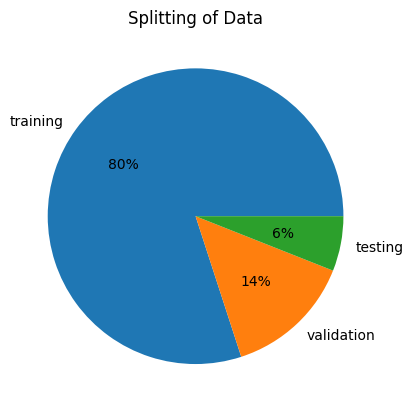

Number of Training Data: 760
Number of Validation Data: 133
Number of Testing Data: 57


In [ ]:
z = resampled_data['labels']
df_train, df_val = train_test_split(resampled_data, test_size=0.2, stratify=z ,random_state=42)
df_val, df_test = train_test_split(df_val, test_size=0.3, stratify=df_val['labels'], random_state=42)

y = np.array([df_train.shape[0], df_val.shape[0], df_test.shape[0]])
label = ["training", "validation", "testing"]

plt.pie(y, labels=label, autopct='%1.f%%')
plt.title("Splitting of Data")
plt.show()
print("Number of Training Data: {}".format(df_train.shape[0]))
print("Number of Validation Data: {}".format(df_val.shape[0]))
print("Number of Testing Data: {}".format(df_test.shape[0]))

In [ ]:
df_test.groupby('labels').count()

,clean
labels,
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,2
8,1


In [ ]:
df_test

,clean,labels
822,suka sakit mata,38
723,minum,28
687,selamat malam robot,25
532,dokter,9
377,cuaca hujan,7
703,mental,27
393,lelah hari,22
108,hari agenda,8
930,enak badan,48
152,buat jadwal,26


In [ ]:
df_test['clean'] = df_test['clean'].replace(to_replace="mat pagi", value="halo selamat pagi")
df_test['clean'] = df_test['clean'].replace(to_replace="mat siang", value="hai selamat siang")

## **Feature Engineering**

###Tokenizer

In [ ]:
Pre_training = 'indobenchmark/indobert-lite-base-p2'
tokenizer = BertTokenizer.from_pretrained(Pre_training)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/225k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.54k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
id = 164
print('Sentences:', df.clean[id])
print('Tokenizer:', tokenizer.tokenize(df.clean[id]))

Sentences: ingat minum obat
Tokenizer: ['ingat', 'minum', 'obat']


## Input formating

In [ ]:
input_formatting = tokenizer.encode_plus(
    df.clean[id],
    add_special_tokens = True,
    padding = 'max_length',
    truncation = 'longest_first',
    # max_length = 10,
    return_attention_mask = True,
    return_token_type_ids = True,
)

input_formatting.keys()

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print('Sentences: \n', df.clean[id])                                           # Data asli
print('Tokenizer: \n', tokenizer.convert_ids_to_tokens(input_formatting['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs: \n', input_formatting['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs: \n',  input_formatting['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask: \n',  input_formatting['attention_mask'])

Sentences: 
 ingat minum obat
Tokenizer: 
 ['[CLS]', 'ingat', 'minum', 'obat', '[SEP]']
Input IDs: 
 [2, 3100, 2579, 925, 3]
Token Type IDs: 
 [0, 0, 0, 0, 0]
Attention Mask: 
 [1, 1, 1, 1, 1]


In [ ]:
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained(Pre_training)
model = TFBertModel.from_pretrained(Pre_training)


# Input text
text = df.clean[id]

# Tokenize and encode text
encoding = tokenizer(
    [text],
    padding=True,
    truncation=True,
    return_tensors='tf',
    add_special_tokens=True
)

input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

print(f"Input IDs: {input_ids}")
print(f"Attention mask: {attention_mask}")

# Generate embeddings
outputs = model(input_ids, attention_mask=attention_mask)
word_embeddings = outputs.last_hidden_state

print(f"Shape of Word Embeddings: {word_embeddings.shape}")

# Decode the token IDs back to text
decoded_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
print(f"Decoded Text: {decoded_text}")

# Tokenize the text again for reference
tokenized_text = tokenizer.tokenize(decoded_text)
print(f"Tokenized Text: {tokenized_text}")

# Encode the text
encoded_text = tokenizer.encode(text, return_tensors='tf')
print(f"Encoded Text: {encoded_text}")

# Print word embeddings for each token
for token, embedding in zip(tokenized_text, word_embeddings[0]):
    print(f"Token: {token}")
    print(f"Embedding: {embedding}")
    print("\n")

# Compute sentence embedding using average pooling
sentence_embedding = tf.reduce_mean(word_embeddings, axis=1)

print("Sentence Embedding:")
print(sentence_embedding)
print(f"Shape of Sentence Embedding: {sentence_embedding.shape}")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


tf_model.h5:   0%|          | 0.00/63.1M [00:00<?, ?B/s]

Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertModel: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. De

Input IDs: [[   2 3100 2579  925    3]]
Attention mask: [[1 1 1 1 1]]
Shape of Word Embeddings: (1, 5, 768)
Decoded Text: ingat minum obat
Tokenized Text: ['ingat', 'minum', 'obat']
Encoded Text: [[   2 3100 2579  925    3]]
Token: ingat
Embedding: [ 1.42034853e+00 -3.37312996e-01 -3.68497998e-01 -5.00437915e-01
 -1.87864029e+00 -6.07922554e-01  7.57700264e-01 -2.95982122e-01
 -1.86887491e+00  9.16464031e-01 -3.58833149e-02 -9.75044072e-02
 -2.46759430e-02 -2.62291044e-01  1.02585816e+00 -2.28560299e-01
  8.68241847e-01 -4.68257904e-01 -1.07956660e+00 -1.24616146e+00
 -7.01605558e-01  1.95896596e-01 -7.81988442e-01  2.66911358e-01
 -1.51513785e-01  1.00740588e+00  1.18417215e+00  3.01983118e-01
 -9.05809104e-01 -6.04859531e-01 -7.21435308e-01 -2.56329727e+00
 -1.27647623e-01  6.21307433e-01 -3.80610168e-01  5.85049510e-01
 -1.34204328e+00  5.80000460e-01  1.13544238e+00  2.06286892e-01
 -6.14255704e-02  1.00633996e-02  2.02292278e-01 -2.19208710e-02
  5.34197450e-01  8.36648405e-01 -1.

## Fungsi Formating

In [ ]:
def convert_input_formatting(sentence):
  return tokenizer.encode_plus(
      sentence,
      add_special_tokens = True,
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = 20,
      return_attention_mask = True,
      return_token_type_ids = True,
  )

def transform_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "attention_mask": attention_masks,
      "token_type_ids": token_type_ids,
  }, label

def encode(df):
  input_ids_list = []
  attention_mask_list = []
  token_type_ids_list = []
  label_list = []
  for sentence, label in df.to_numpy():
    bert_input = convert_input_formatting(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(transform_to_dict)

In [ ]:
data_train = encode(df_train).batch(16)
data_val = encode(df_val).batch(16)
data_test = encode(df_test).batch(16)

## **Model Building**



---



## **Evaluation**

**Batch size:** 16, 32 \\
**Learning rate (Adam):** 5e-5, 3e-5, 2e-5 \\
**Number of epochs:** 2, 3, 4, 100


---



**Batch size:** 16 \\
**Learning rate (Adam):** 5e-5 \\
**Number of epochs:** 2

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model1 = model.fit(
    data_train,
    epochs=2,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert

Epoch 1/2
48/48 [==============================] - 43s 207ms/step - loss: 3.8525 - accuracy: 0.0882 - val_loss: 2.8112 - val_accuracy: 0.5188
Epoch 2/2
48/48 [==============================] - 5s 95ms/step - loss: 1.3293 - accuracy: 0.8803 - val_loss: 0.5383 - val_accuracy: 0.9774


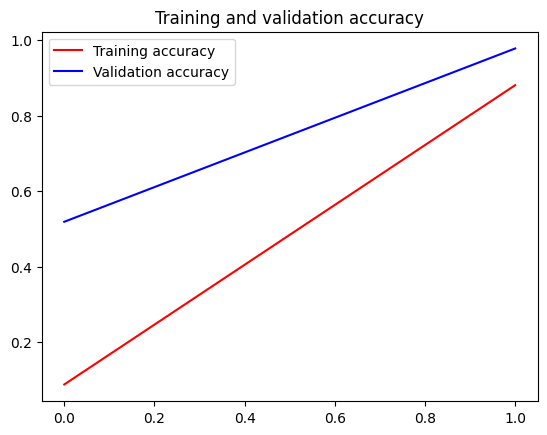

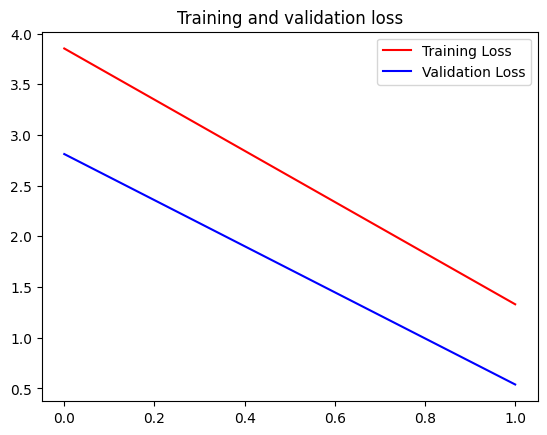

In [ ]:
acc = model1.history['accuracy']
val_acc = model1.history['val_accuracy']
loss = model1.history['loss']
val_loss = model1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4/4 [==============================] - 0s 31ms/step - loss: 0.6775 - accuracy: 0.9298
Test Loss: 0.6775118112564087
Test Accuracy: 0.9298245906829834


In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 35ms/step - loss: 0.6775 - accuracy: 0.9298
Test Loss: 0.6775118112564087
Test Accuracy: 0.9298245906829834 

4/4 [==============================] - 3s 61ms/step
Precision: 0.9210526315789473
recall: 0.9298245614035088
f1 score: 0.9181286549707601


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 5e-5 \\
**Number of epochs:** 3

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model2 = model.fit(
    data_train,
    epochs=3,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert

Epoch 1/3
48/48 [==============================] - 50s 167ms/step - loss: 3.7290 - accuracy: 0.1342 - val_loss: 2.4869 - val_accuracy: 0.6466
Epoch 2/3
48/48 [==============================] - 5s 112ms/step - loss: 1.2078 - accuracy: 0.8908 - val_loss: 0.4869 - val_accuracy: 0.9774
Epoch 3/3
48/48 [==============================] - 5s 96ms/step - loss: 0.2773 - accuracy: 0.9921 - val_loss: 0.2121 - val_accuracy: 0.9850


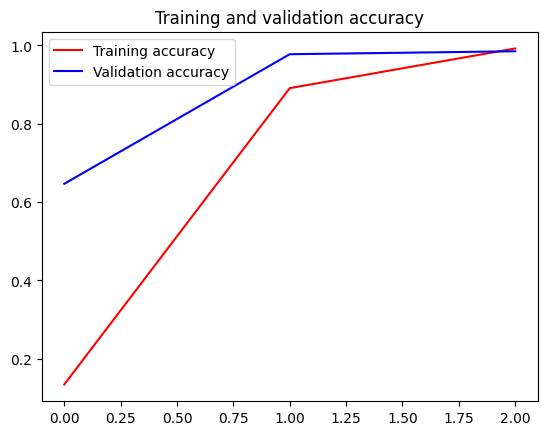

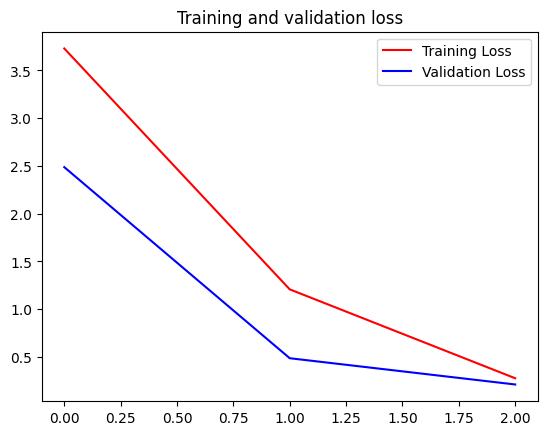

In [ ]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 46ms/step - loss: 0.2533 - accuracy: 0.9825
Test Loss: 0.2532869875431061
Test Accuracy: 0.9824561476707458 

4/4 [==============================] - 3s 48ms/step
Precision: 0.9912280701754386
recall: 0.9824561403508771
f1 score: 0.9824561403508771




---



**Batch size:** 16 \\
**Learning rate (Adam):** 5e-5 \\
**Number of epochs:** 4

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model3 = model.fit(
    data_train,
    epochs=4,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['clas

Epoch 1/4
48/48 [==============================] - 49s 190ms/step - loss: 3.8332 - accuracy: 0.0803 - val_loss: 2.7407 - val_accuracy: 0.5865
Epoch 2/4
48/48 [==============================] - 6s 130ms/step - loss: 1.3081 - accuracy: 0.8750 - val_loss: 0.5273 - val_accuracy: 0.9474
Epoch 3/4
48/48 [==============================] - 6s 125ms/step - loss: 0.2896 - accuracy: 0.9908 - val_loss: 0.2296 - val_accuracy: 0.9925
Epoch 4/4
48/48 [==============================] - 5s 113ms/step - loss: 0.1404 - accuracy: 0.9961 - val_loss: 0.1693 - val_accuracy: 0.9850


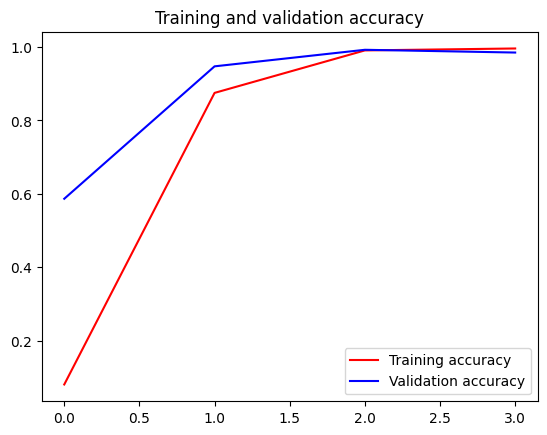

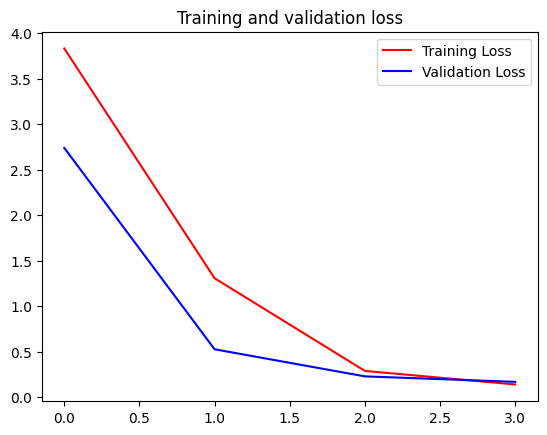

In [ ]:
acc = model3.history['accuracy']
val_acc = model3.history['val_accuracy']
loss = model3.history['loss']
val_loss = model3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 55ms/step - loss: 0.1868 - accuracy: 0.9825
Test Loss: 0.18682034313678741
Test Accuracy: 0.9824561476707458 

4/4 [==============================] - 3s 54ms/step
Precision: 0.9736842105263158
recall: 0.9824561403508771
f1 score: 0.976608187134503


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 5e-5 \\
**Number of epochs:** 100

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.98 and logs.get('val_loss')<0.1):
            print("\n\nValidation accuracy get 98%\n")
            self.model.stop_training = True

callback=mycallback()

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model4 = model.fit(
    data_train,
    epochs=100,
    validation_data=data_val,
    callbacks=callback
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert

Epoch 1/100
48/48 [==============================] - 41s 186ms/step - loss: 3.8850 - accuracy: 0.0513 - val_loss: 3.0535 - val_accuracy: 0.5113
Epoch 2/100
48/48 [==============================] - 5s 96ms/step - loss: 1.5005 - accuracy: 0.8368 - val_loss: 0.5988 - val_accuracy: 0.9398
Epoch 3/100
48/48 [==============================] - 5s 106ms/step - loss: 0.3195 - accuracy: 0.9895 - val_loss: 0.2505 - val_accuracy: 0.9774
Epoch 4/100
48/48 [==============================] - 5s 96ms/step - loss: 0.1493 - accuracy: 0.9947 - val_loss: 0.1732 - val_accuracy: 0.9925
Epoch 5/100
48/48 [==============================] - 5s 96ms/step - loss: 0.0950 - accuracy: 0.9974 - val_loss: 0.1366 - val_accuracy: 0.9925
Epoch 6/100
48/48 [==============================] - 5s 106ms/step - loss: 0.0698 - accuracy: 0.9974 - val_loss: 0.1170 - val_accuracy: 0.9925
Epoch 7/100
48/48 [==============================] - 5s 96ms/step - loss: 0.0563 - accuracy: 0.9974 - val_loss: 0.1043 - val_accuracy: 0.9925
Ep

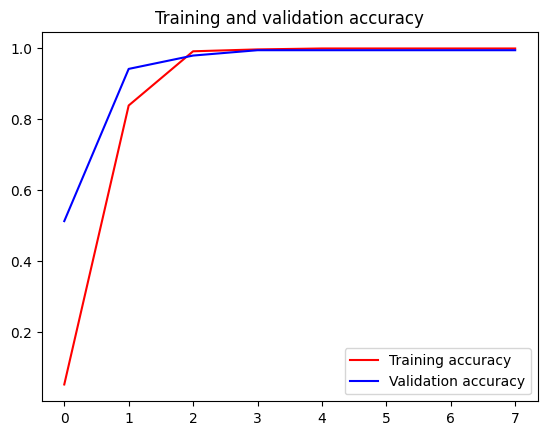

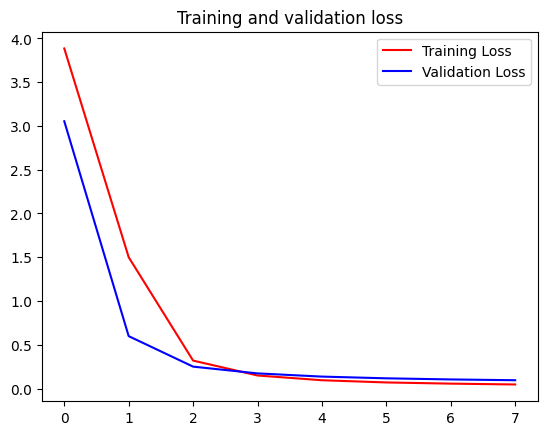

In [ ]:
acc = model4.history['accuracy']
val_acc = model4.history['val_accuracy']
loss = model4.history['loss']
val_loss = model4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 52ms/step - loss: 0.1279 - accuracy: 0.9649
Test Loss: 0.12791657447814941
Test Accuracy: 0.9649122953414917 

4/4 [==============================] - 3s 48ms/step
Precision: 0.9444444444444443
recall: 0.9649122807017544
f1 score: 0.952046783625731


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 3e-5 \\
**Number of epochs:** 2

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model5 = model.fit(
    data_train,
    epochs=2,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert

Epoch 1/2
48/48 [==============================] - 43s 176ms/step - loss: 3.8352 - accuracy: 0.1000 - val_loss: 3.0621 - val_accuracy: 0.4060
Epoch 2/2
48/48 [==============================] - 5s 107ms/step - loss: 1.5717 - accuracy: 0.8579 - val_loss: 0.7338 - val_accuracy: 0.9699


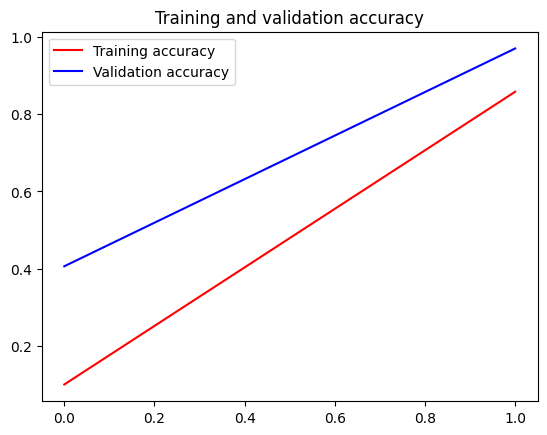

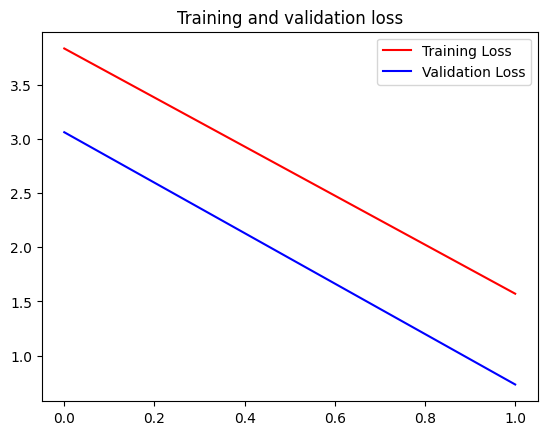

In [ ]:
acc = model5.history['accuracy']
val_acc = model5.history['val_accuracy']
loss = model5.history['loss']
val_loss = model5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 50ms/step - loss: 0.8742 - accuracy: 0.9298
Test Loss: 0.8741965293884277
Test Accuracy: 0.9298245906829834 

4/4 [==============================] - 3s 48ms/step
Precision: 0.9210526315789473
recall: 0.9298245614035088
f1 score: 0.9181286549707601


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 3e-5 \\
**Number of epochs:** 3

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model6 = model.fit(
    data_train,
    epochs=3,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert

Epoch 1/3
48/48 [==============================] - 43s 203ms/step - loss: 3.8210 - accuracy: 0.1132 - val_loss: 2.9897 - val_accuracy: 0.4662
Epoch 2/3
48/48 [==============================] - 5s 99ms/step - loss: 1.5256 - accuracy: 0.8684 - val_loss: 0.7055 - val_accuracy: 0.9699
Epoch 3/3
48/48 [==============================] - 5s 96ms/step - loss: 0.4161 - accuracy: 0.9921 - val_loss: 0.3234 - val_accuracy: 0.9774


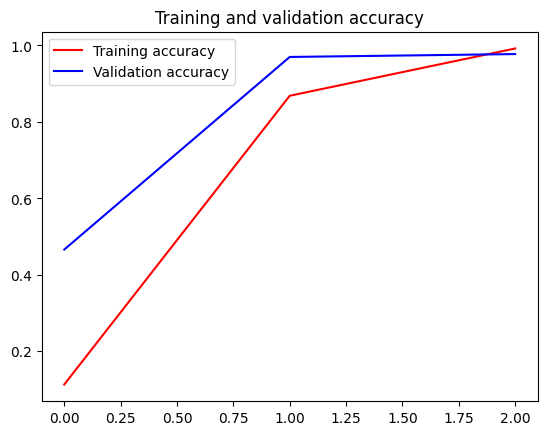

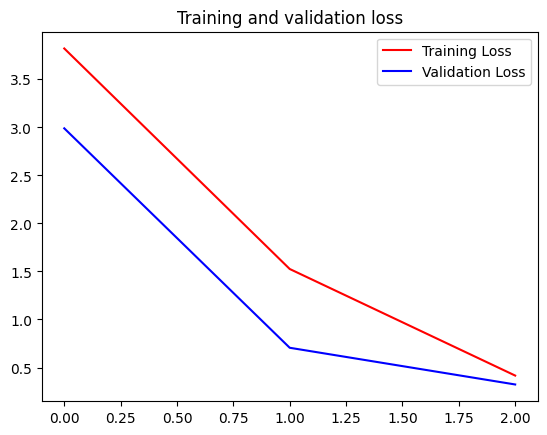

In [ ]:
acc = model6.history['accuracy']
val_acc = model6.history['val_accuracy']
loss = model6.history['loss']
val_loss = model6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 35ms/step - loss: 0.3917 - accuracy: 0.9825
Test Loss: 0.39167386293411255
Test Accuracy: 0.9824561476707458 

4/4 [==============================] - 4s 48ms/step
Precision: 0.9912280701754386
recall: 0.9824561403508771
f1 score: 0.9824561403508771




---



**Batch size:** 16 \\
**Learning rate (Adam):** 3e-5 \\
**Number of epochs:** 4

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model7 = model.fit(
    data_train,
    epochs=4,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert

Epoch 1/4
48/48 [==============================] - 45s 184ms/step - loss: 3.8596 - accuracy: 0.0855 - val_loss: 3.1987 - val_accuracy: 0.3835
Epoch 2/4
48/48 [==============================] - 5s 108ms/step - loss: 1.6627 - accuracy: 0.8474 - val_loss: 0.7818 - val_accuracy: 0.9549
Epoch 3/4
48/48 [==============================] - 5s 108ms/step - loss: 0.4469 - accuracy: 0.9921 - val_loss: 0.3468 - val_accuracy: 0.9850
Epoch 4/4
48/48 [==============================] - 5s 98ms/step - loss: 0.2175 - accuracy: 0.9961 - val_loss: 0.2367 - val_accuracy: 0.9925


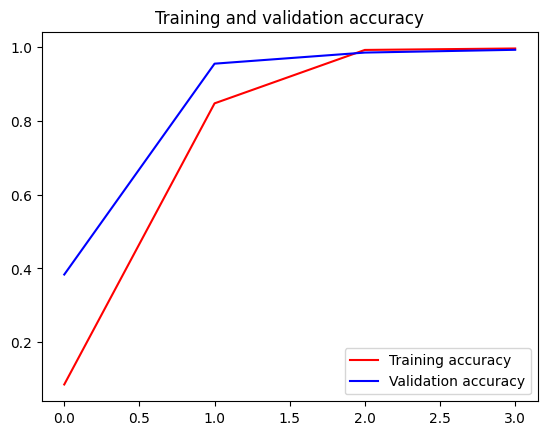

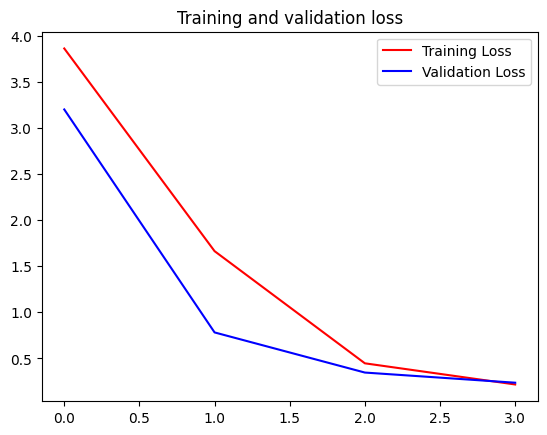

In [ ]:
acc = model7.history['accuracy']
val_acc = model7.history['val_accuracy']
loss = model7.history['loss']
val_loss = model7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 33ms/step - loss: 0.2755 - accuracy: 0.9649
Test Loss: 0.2754763662815094
Test Accuracy: 0.9649122953414917 

4/4 [==============================] - 3s 49ms/step
Precision: 0.9619883040935672
recall: 0.9649122807017544
f1 score: 0.9578947368421052


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 3e-5 \\
**Number of epochs:** 100

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model8 = model.fit(
    data_train,
    epochs=100,
    validation_data=data_val,
    callbacks=callback
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['clas

Epoch 1/100
48/48 [==============================] - 53s 209ms/step - loss: 3.7947 - accuracy: 0.1395 - val_loss: 2.8546 - val_accuracy: 0.4812
Epoch 2/100
48/48 [==============================] - 5s 114ms/step - loss: 1.4776 - accuracy: 0.8711 - val_loss: 0.7383 - val_accuracy: 0.9474
Epoch 3/100
48/48 [==============================] - 6s 125ms/step - loss: 0.4137 - accuracy: 0.9882 - val_loss: 0.3399 - val_accuracy: 0.9624
Epoch 4/100
48/48 [==============================] - 5s 114ms/step - loss: 0.2058 - accuracy: 0.9961 - val_loss: 0.2378 - val_accuracy: 0.9850
Epoch 5/100
48/48 [==============================] - 5s 107ms/step - loss: 0.1388 - accuracy: 0.9961 - val_loss: 0.1916 - val_accuracy: 0.9850
Epoch 6/100
48/48 [==============================] - 5s 107ms/step - loss: 0.1033 - accuracy: 0.9974 - val_loss: 0.1629 - val_accuracy: 0.9850
Epoch 7/100
48/48 [==============================] - 5s 111ms/step - loss: 0.0835 - accuracy: 0.9974 - val_loss: 0.1436 - val_accuracy: 0.985

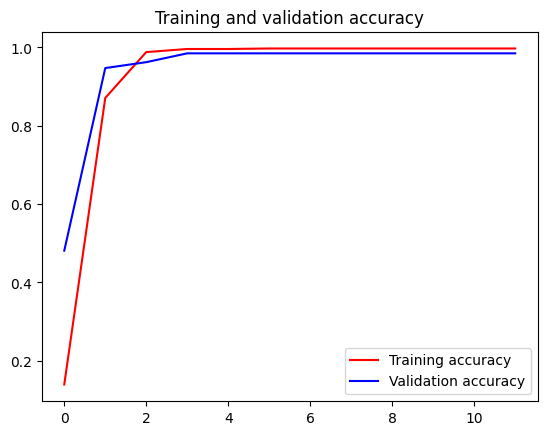

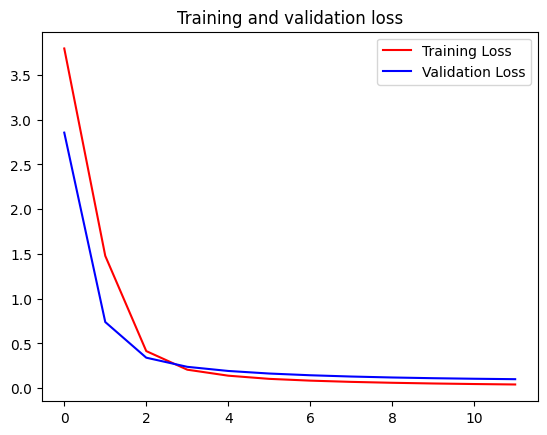

In [ ]:
acc = model8.history['accuracy']
val_acc = model8.history['val_accuracy']
loss = model8.history['loss']
val_loss = model8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 54ms/step - loss: 0.1353 - accuracy: 0.9649
Test Loss: 0.13529559969902039
Test Accuracy: 0.9649122953414917 

4/4 [==============================] - 4s 53ms/step
Precision: 0.9473684210526315
recall: 0.9649122807017544
f1 score: 0.9532163742690057


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 2e-5 \\
**Number of epochs:** 2

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model9 = model.fit(
    data_train,
    epochs=2,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert

Epoch 1/2
48/48 [==============================] - 41s 175ms/step - loss: 3.8751 - accuracy: 0.1000 - val_loss: 3.2966 - val_accuracy: 0.5188
Epoch 2/2
48/48 [==============================] - 5s 109ms/step - loss: 1.9714 - accuracy: 0.8355 - val_loss: 1.0907 - val_accuracy: 0.9549


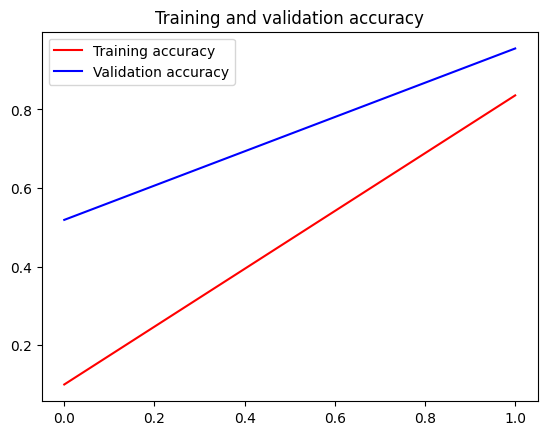

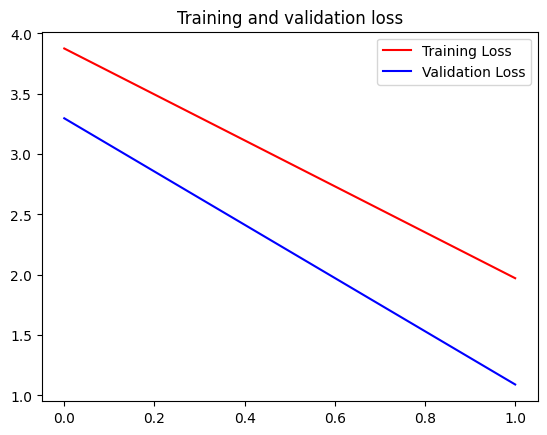

In [ ]:
acc = model9.history['accuracy']
val_acc = model9.history['val_accuracy']
loss = model9.history['loss']
val_loss = model9.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 53ms/step - loss: 1.2206 - accuracy: 0.9298
Test Loss: 1.2206279039382935
Test Accuracy: 0.9298245906829834 

4/4 [==============================] - 3s 62ms/step
Precision: 0.9298245614035088
recall: 0.9298245614035088
f1 score: 0.9181286549707601


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 2e-5 \\
**Number of epochs:** 3

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model10 = model.fit(
    data_train,
    epochs=3,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['bert

Epoch 1/3
48/48 [==============================] - 41s 193ms/step - loss: 3.9004 - accuracy: 0.0816 - val_loss: 3.4340 - val_accuracy: 0.4211
Epoch 2/3
48/48 [==============================] - 5s 96ms/step - loss: 2.0859 - accuracy: 0.8118 - val_loss: 1.1541 - val_accuracy: 0.9398
Epoch 3/3
48/48 [==============================] - 5s 103ms/step - loss: 0.6866 - accuracy: 0.9855 - val_loss: 0.5357 - val_accuracy: 0.9774


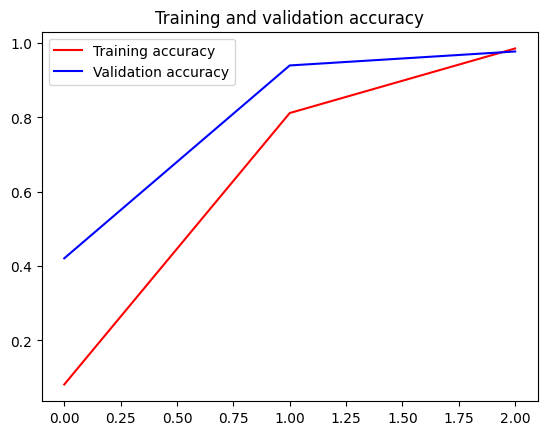

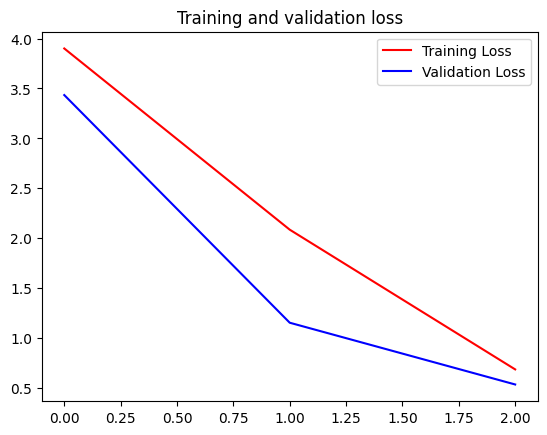

In [ ]:
acc = model10.history['accuracy']
val_acc = model10.history['val_accuracy']
loss = model10.history['loss']
val_loss = model10.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 52ms/step - loss: 0.6267 - accuracy: 0.9474
Test Loss: 0.6266533136367798
Test Accuracy: 0.9473684430122375 

4/4 [==============================] - 3s 47ms/step
Precision: 0.956140350877193
recall: 0.9473684210526315
f1 score: 0.9415204678362573


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 2e-5 \\
**Number of epochs:** 4

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model11 = model.fit(
    data_train,
    epochs=4,
    validation_data=data_val
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['clas

Epoch 1/4
48/48 [==============================] - 74s 235ms/step - loss: 3.8946 - accuracy: 0.0605 - val_loss: 3.4194 - val_accuracy: 0.3609
Epoch 2/4
48/48 [==============================] - 7s 149ms/step - loss: 2.1698 - accuracy: 0.7618 - val_loss: 1.1669 - val_accuracy: 0.9549
Epoch 3/4
48/48 [==============================] - 6s 118ms/step - loss: 0.7183 - accuracy: 0.9868 - val_loss: 0.5310 - val_accuracy: 0.9850
Epoch 4/4
48/48 [==============================] - 5s 104ms/step - loss: 0.3498 - accuracy: 0.9947 - val_loss: 0.3305 - val_accuracy: 0.9850


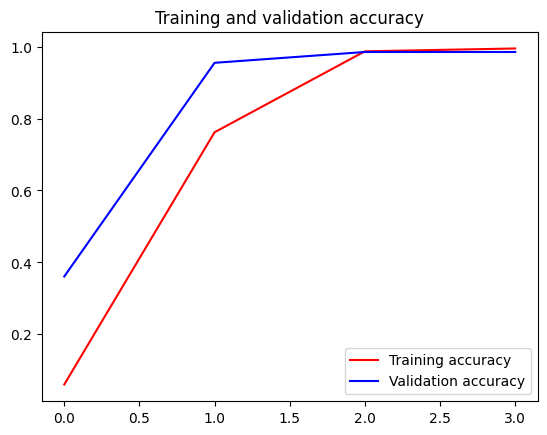

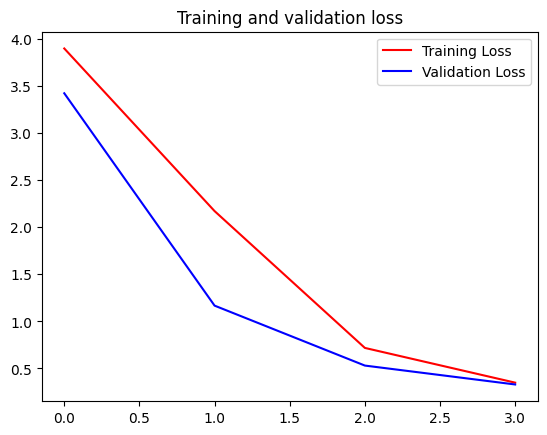

In [ ]:
acc = model11.history['accuracy']
val_acc = model11.history['val_accuracy']
loss = model11.history['loss']
val_loss = model11.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 39ms/step - loss: 0.4133 - accuracy: 0.9649
Test Loss: 0.4132590591907501
Test Accuracy: 0.9649122953414917 

4/4 [==============================] - 5s 54ms/step
Precision: 0.9649122807017544
recall: 0.9649122807017544
f1 score: 0.9590643274853801


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---



**Batch size:** 16 \\
**Learning rate (Adam):** 2e-5 \\
**Number of epochs:** 100

In [ ]:
model = TFBertForSequenceClassification.from_pretrained(Pre_training, num_labels=50)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model12 = model.fit(
    data_train,
    epochs=100,
    validation_data=data_val,
    callbacks=callback
    )

You are using a model of type albert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at indobenchmark/indobert-lite-base-p2 were not used when initializing TFBertForSequenceClassification: ['predictions', 'sop_classifier', 'albert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-lite-base-p2 and are newly initialized: ['clas

Epoch 1/100
48/48 [==============================] - 51s 219ms/step - loss: 3.8779 - accuracy: 0.1000 - val_loss: 3.3559 - val_accuracy: 0.4511
Epoch 2/100
48/48 [==============================] - 5s 113ms/step - loss: 2.0443 - accuracy: 0.7961 - val_loss: 1.1457 - val_accuracy: 0.9398
Epoch 3/100
48/48 [==============================] - 6s 119ms/step - loss: 0.6824 - accuracy: 0.9803 - val_loss: 0.5226 - val_accuracy: 0.9850
Epoch 4/100
48/48 [==============================] - 5s 112ms/step - loss: 0.3392 - accuracy: 0.9961 - val_loss: 0.3252 - val_accuracy: 0.9925
Epoch 5/100
48/48 [==============================] - 6s 121ms/step - loss: 0.2189 - accuracy: 0.9974 - val_loss: 0.2402 - val_accuracy: 0.9925
Epoch 6/100
48/48 [==============================] - 6s 119ms/step - loss: 0.1622 - accuracy: 0.9974 - val_loss: 0.1952 - val_accuracy: 0.9925
Epoch 7/100
48/48 [==============================] - 6s 116ms/step - loss: 0.1289 - accuracy: 0.9974 - val_loss: 0.1667 - val_accuracy: 0.992

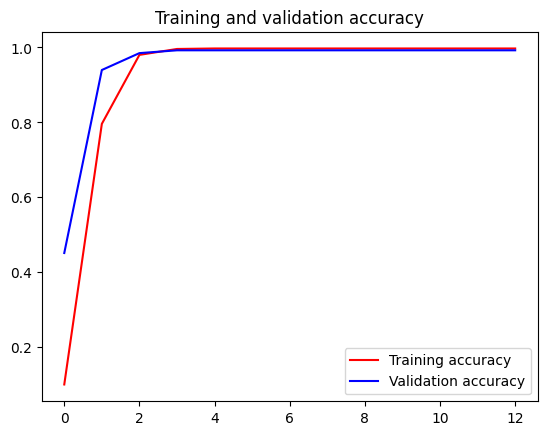

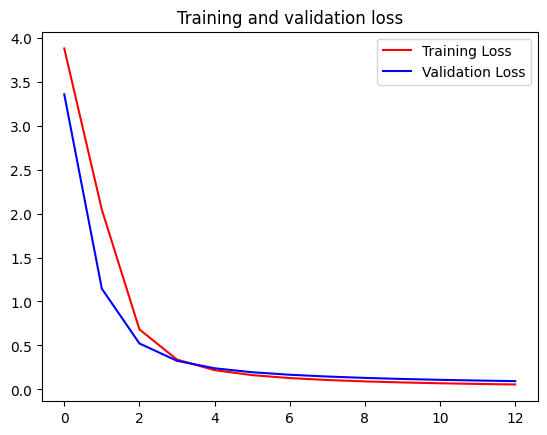

In [ ]:
acc = model12.history['accuracy']
val_acc = model12.history['val_accuracy']
loss = model12.history['loss']
val_loss = model12.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy} \n")

# Get model predictions on the test set
y_pred = model.predict(data_test)
y_pred_labels = tf.argmax(y_pred.logits, axis=1)  # Get the predicted labels

y_true = []
for batch in data_test:
    # Assuming labels are the second element in each batch
    y_true.extend(batch[1].numpy())

# Generate the classification report
report = classification_report(y_true, y_pred_labels, output_dict=True)

# Print precision, recall, and F1 score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
print(f"Precision: {precision}")
print(f"recall: {recall}")
print(f"f1 score: {f1_score}")

4/4 [==============================] - 0s 57ms/step - loss: 0.1267 - accuracy: 0.9825
Test Loss: 0.12668608129024506
Test Accuracy: 0.9824561476707458 

4/4 [==============================] - 5s 55ms/step
Precision: 0.9736842105263158
recall: 0.9824561403508771
f1 score: 0.9766081871345029


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model.save_weights('modelQA.h5')

In [ ]:
files.download('modelQA.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluation Visualization

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_raw = model.predict(data_test)
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['labels'])

labels = range(51)
conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

class_report = classification_report(y_true, y_pred, labels=labels, target_names=[f'Label {l}' for l in labels], output_dict=True)
accuracy = accuracy_score(y_true, y_pred)

4/4 [==============================] - 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

In [ ]:
report = classification_report(y_true, y_pred, target_names=classes)
print(report)

                 precision    recall  f1-score   support

           halo       1.00      1.00      1.00         1
        kondisi       1.00      1.00      1.00         1
           pagi       1.00      1.00      1.00         1
          siang       1.00      1.00      1.00         1
           sore       1.00      1.00      1.00         1
          malam       1.00      1.00      1.00         1
            jam       1.00      1.00      1.00         1
     perpisahan       1.00      1.00      1.00         2
    terimakasih       1.00      1.00      1.00         1
     pertanyaan       1.00      1.00      1.00         1
     Identittas       1.00      1.00      1.00         1
        tanggal       1.00      1.00      1.00         1
           hari       0.50      1.00      0.67         1
          bulan       1.00      1.00      1.00         1
 daftarkegiatan       1.00      1.00      1.00         1
          Makan       1.00      1.00      1.00         2
         ibadah       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


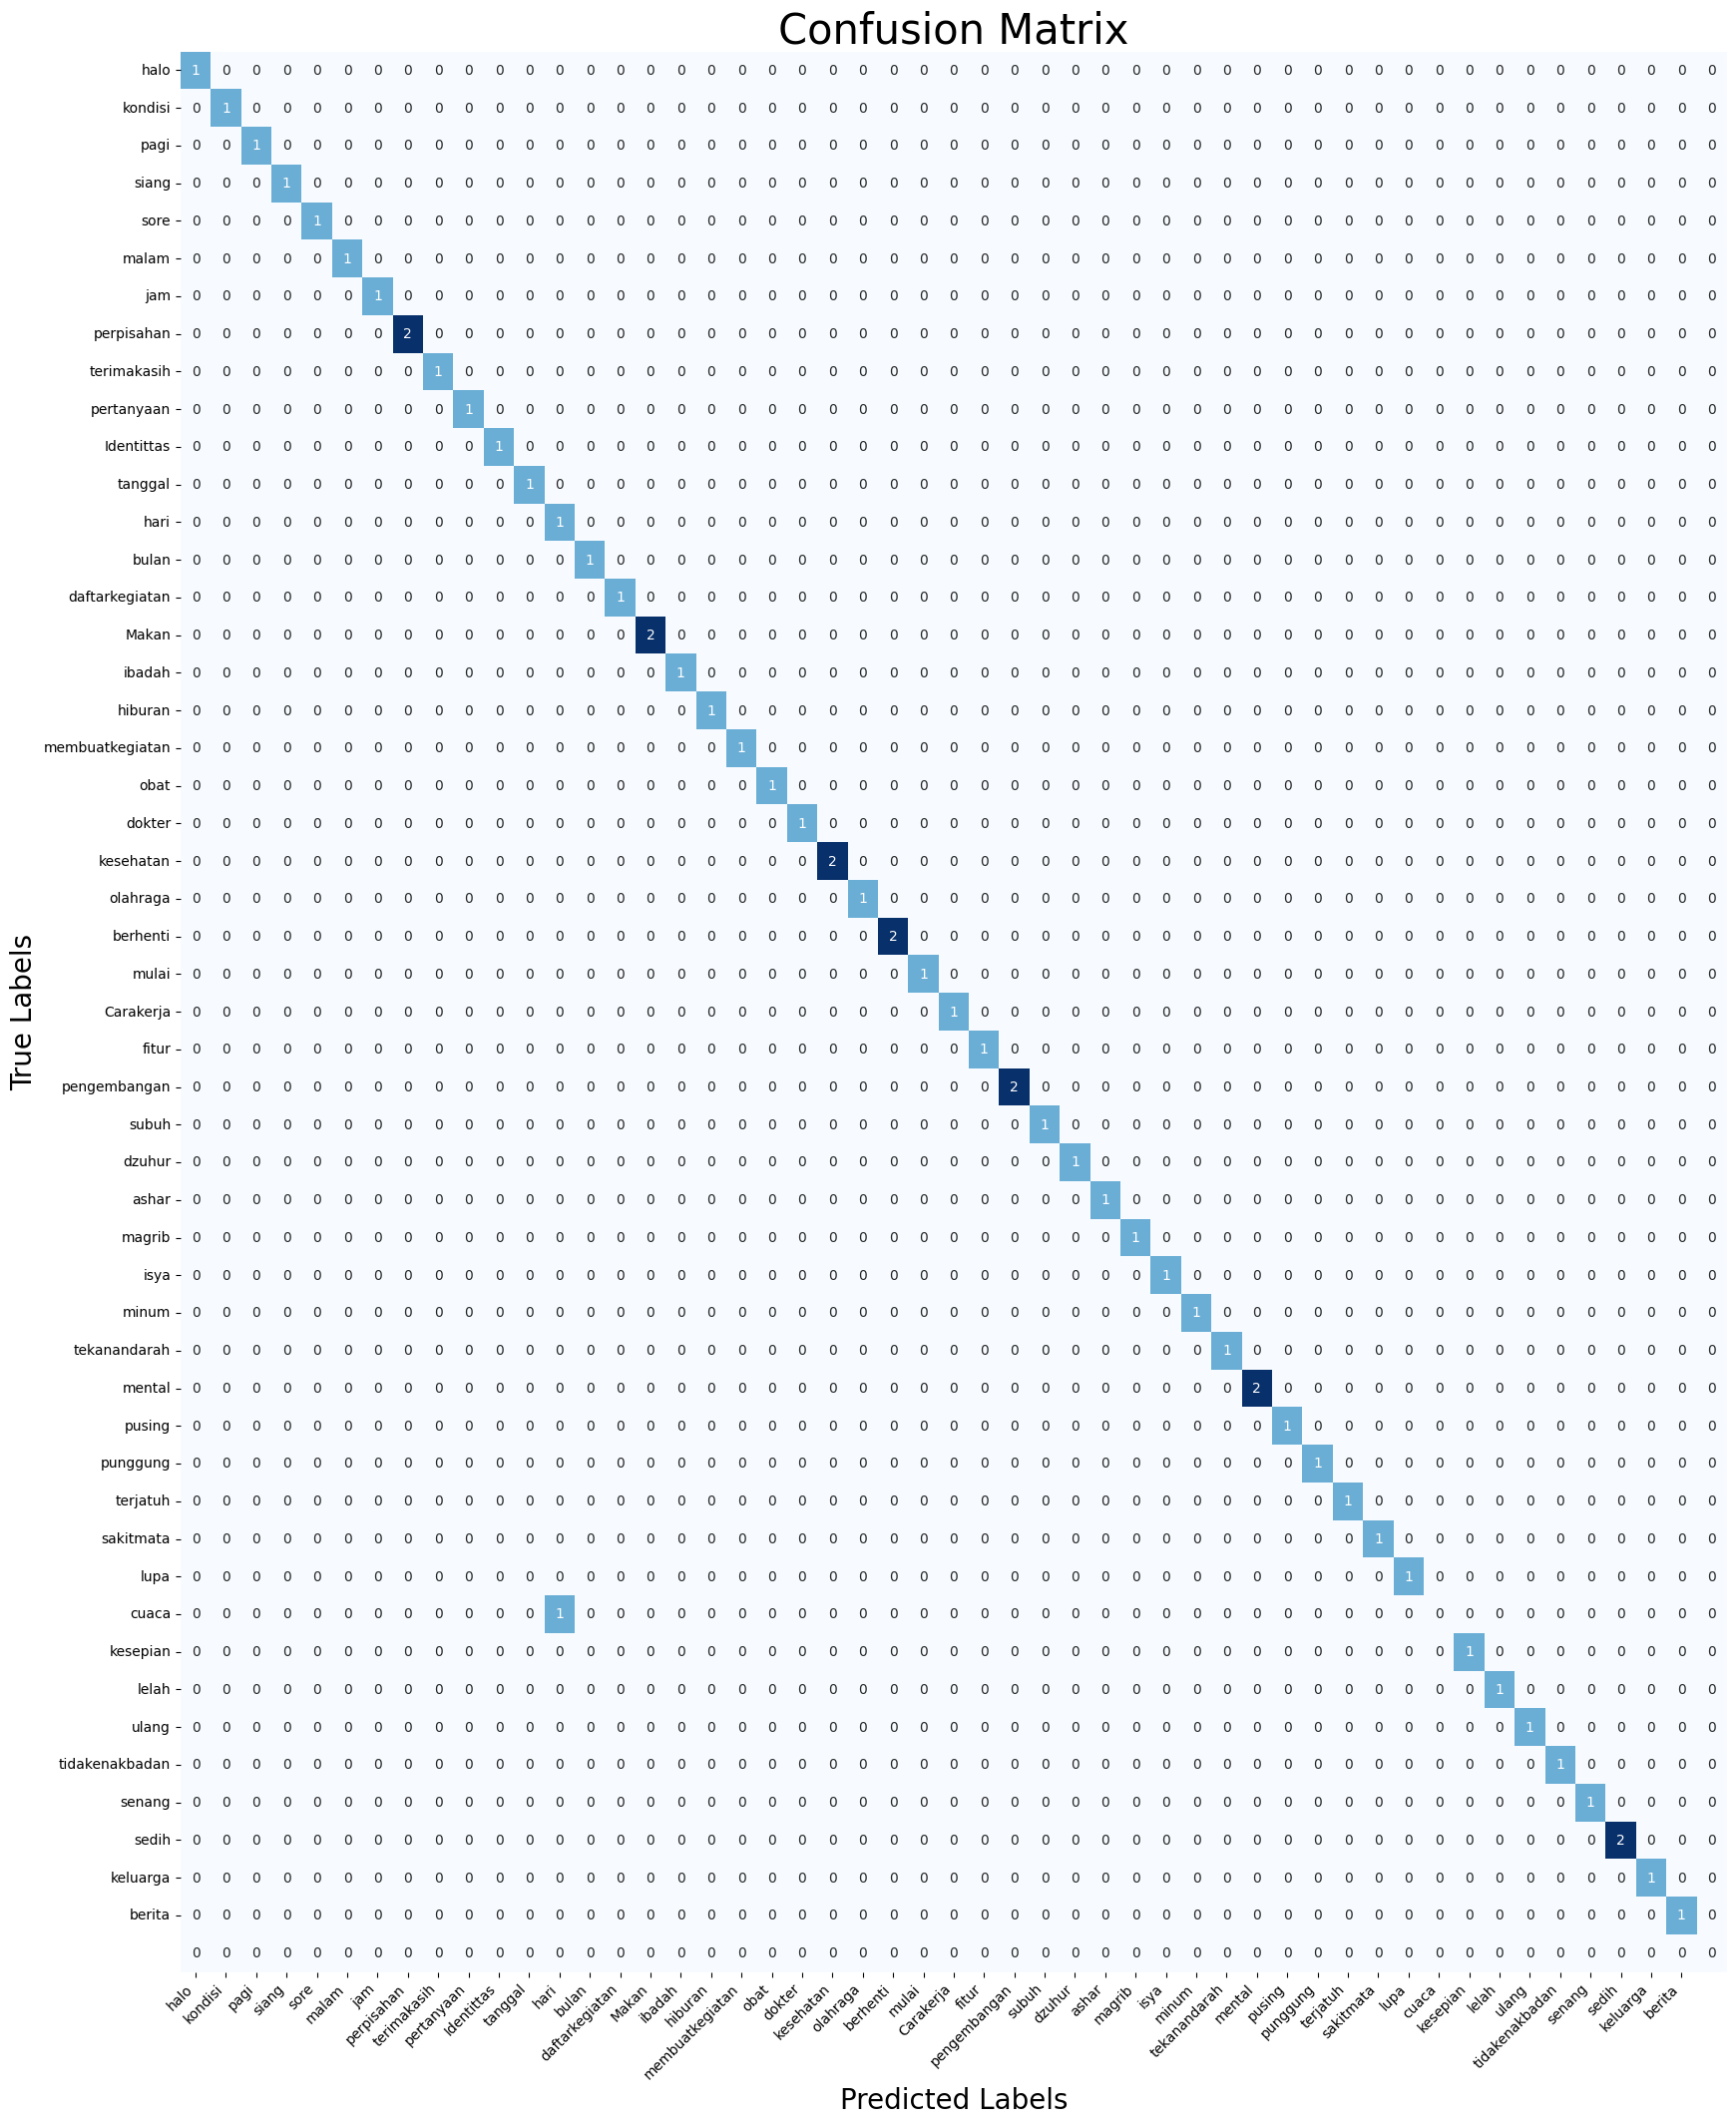

In [ ]:
plt.figure(figsize=(20,25))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes, cbar=False)
plt.xlabel('Predicted Labels', fontsize=20)
plt.ylabel('True Labels', fontsize=20)
plt.title('Confusion Matrix', fontsize=30)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()



---



##Interface

In [ ]:
model.load_weights('modelQA.h5')

In [ ]:
chat = "bagaiamana berita hot saat ini?"
prechat = text_cleaning(chat)
prechat = lemmati(prechat)
input_text_tokenized = tokenizer.encode(prechat,
                                             add_special_tokens=True,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')

bert_predict = model(input_text_tokenized)          # Lakukan prediksi
bert_predict = tf.nn.softmax(bert_predict[0], axis=-1)         # Softmax function untuk mendapatkan hasil klasifikasi
output = tf.argmax(bert_predict, axis=1)
predicted_class_probability = bert_predict[0][output[0]].numpy()


In [ ]:
print(prechat)

In [ ]:
print(f'predict bert softmax:  {bert_predict}')
print(f'output:  {output}')
print(f'predicted class probability: {predicted_class_probability:.2%}')

In [ ]:
data1 = datasetQA

In [ ]:
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen

for intent in data1['data']:
  responses[intent['label']]=intent['answers']
  for lines in intent['questions']:
    inputs.append(lines)
    tags.append(intent['label'])
    for pattern in intent['questions']:
      # add to our classes list
      if intent['label'] not in classes:
        classes.append(intent['label'])

In [ ]:
data = pd.DataFrame({"questions":inputs, "label":tags})

In [ ]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

In [ ]:
 # Print 5 label dengan persentase tertinggi
class_probabilities = bert_predict[0].numpy()
label_names = le.classes_
 # Simpan pasangan label dan probabilitas dalam daftar
predictions = [(label, probability) for label, probability in zip(label_names, class_probabilities)]

In [ ]:
predictions.sort(key=lambda x: x[1], reverse=True)

In [ ]:
top_5_predictions = predictions[:5]
for label, probability in top_5_predictions:
        print(f'Predicted Probability for {label}: {probability:.9%}')
predicted_label = label_names[output[0]]
print(f'Predicted Label: {predicted_label}')

In [ ]:
import random
response_tag = le.inverse_transform([output])[0] # Label yang terprediksi
respons = random.choice(responses[response_tag])

In [ ]:
print(respons)